<a href="https://colab.research.google.com/github/Kevinsamuelgitau/Gitau/blob/master/SAMUEL_GITAU_W8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OVERVIEW

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# IMPORTING LIBRARIES

In [1]:
# Importing all libraries required for analysis
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOADING THE DATASET

In [2]:
# loading the dataset
import io
import requests

url="http://bit.ly/hypothyroid_data"
s=requests.get(url).content
df =pd.read_csv(io.StringIO(s.decode('utf-8')))
# checking the first records of the dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
# Checking the last records of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
# checking how many records are in the dataset
df.shape

(3163, 26)

In [5]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
# checking basic statistics of the dataset
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


# CLEANING THE DATASET

In [7]:

# dropping unnecessary columns
# TBG column doesn't have meaningful data
df = df.drop('TBG', axis = 1)
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n


In [8]:
# Check for and deal with missing values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [0]:
# some columns have records appearing as ?, which cannot be detected as nulls
column = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
          'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor',
          'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 
          'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']

for i , field in enumerate(column):
  df[field] = df[field].replace('?', np.NaN)
  
df.isnull().sum()
df = df.dropna()

In [10]:
df.shape

(2000, 25)

In [11]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3158    False
3159    False
3160    False
3161    False
3162    False
Length: 2000, dtype: bool

In [12]:
# Dropping duplicates
df.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n


In [13]:
#To remove white spaces in our columns
df.columns.str.replace(" "," ")

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [14]:
# changing datatypes
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['status','sex',	'on_thyroxine',	'query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',	'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre',	'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
le = LabelEncoder()
# Converting the variables to numerical
#
for i in range(18):
    new = le.fit_transform(df[categorical_features[i]])
    df[categorical_features[i]] = new
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0.60,0,15,0,1.48,0,10,n
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,145,0,1.70,0,19,0,1.13,0,17,n
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.20,0,4,0,1,0,0,n
3,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,430,0,0.40,0,6,0,1.04,0,6,n
4,0,77,1,0,0,0,0,0,0,0,0,0,0,0,0,7.30,0,1.20,0,57,0,1.28,0,44,n


In [15]:
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
3158,1,58,0,0,0,0,0,0,0,0,0,0,0,0,0,5.80,0,1.70,0,86,0,0.91,0,95,n
3159,1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0.80,0,1.80,0,99,0,1.01,0,98,n
3160,1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,1.20,0,0.60,0,71,0,0.68,0,104,n
3161,1,74,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,0,0.10,0,65,0,0.48,0,137,n
3162,1,56,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.80,0,139,0,0.97,0,143,n


In [16]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     2000 non-null   int64 
 1   age                        2000 non-null   object
 2   sex                        2000 non-null   int64 
 3   on_thyroxine               2000 non-null   int64 
 4   query_on_thyroxine         2000 non-null   int64 
 5   on_antithyroid_medication  2000 non-null   int64 
 6   thyroid_surgery            2000 non-null   int64 
 7   query_hypothyroid          2000 non-null   int64 
 8   query_hyperthyroid         2000 non-null   int64 
 9   pregnant                   2000 non-null   int64 
 10  sick                       2000 non-null   int64 
 11  tumor                      2000 non-null   int64 
 12  lithium                    2000 non-null   int64 
 13  goitre                     2000 non-null   int64 
 14  TSH_meas

In [0]:
# converting object datatypes to numericals
df['age'] = df['age'].apply(pd.to_numeric, errors='coerce')
df['TBG_measured'] = df['TBG_measured'].apply(pd.to_numeric, errors='coerce')
df['FTI'] = df['FTI'].apply(pd.to_numeric, errors='coerce')
df['T4U'] = df['T4U'].apply(pd.to_numeric, errors='coerce')
df['TT4'] = df['TT4'].apply(pd.to_numeric, errors='coerce')
df['T3'] = df['T3'].apply(pd.to_numeric, errors='coerce')
df['TSH'] = df['TSH'].apply(pd.to_numeric, errors='coerce')

In [18]:
# confirming datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     2000 non-null   int64  
 1   age                        2000 non-null   int64  
 2   sex                        2000 non-null   int64  
 3   on_thyroxine               2000 non-null   int64  
 4   query_on_thyroxine         2000 non-null   int64  
 5   on_antithyroid_medication  2000 non-null   int64  
 6   thyroid_surgery            2000 non-null   int64  
 7   query_hypothyroid          2000 non-null   int64  
 8   query_hyperthyroid         2000 non-null   int64  
 9   pregnant                   2000 non-null   int64  
 10  sick                       2000 non-null   int64  
 11  tumor                      2000 non-null   int64  
 12  lithium                    2000 non-null   int64  
 13  goitre                     2000 non-null   int64

In [19]:
# checking shape before removing outliers
df.shape

(2000, 25)

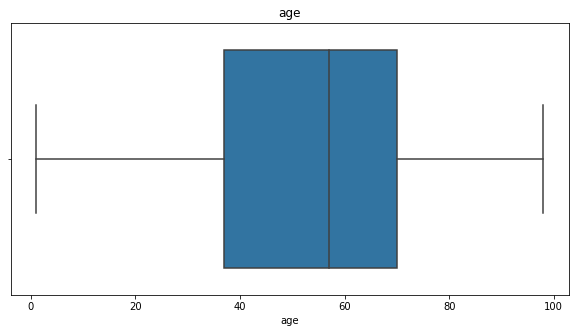

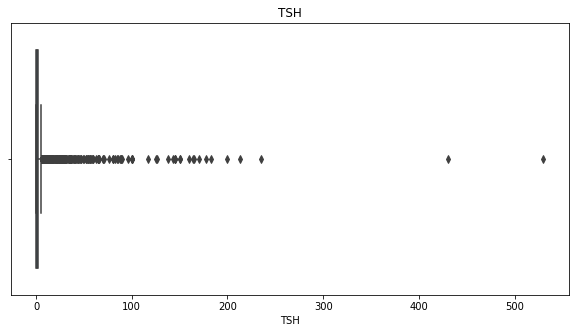

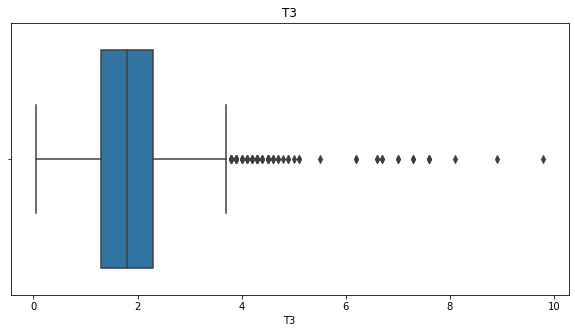

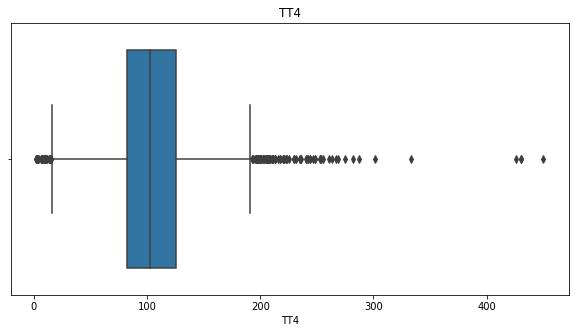

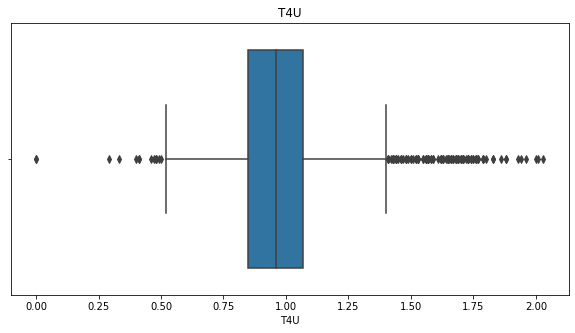

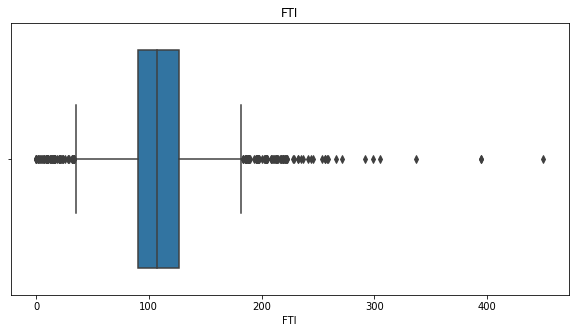

In [20]:
# To check for outliers through boxplots
#

numerical= ['age', 'TSH',  'T3',  'TT4',  'T4U', 'FTI']
for i, j in enumerate(numerical):
  plt.figure(figsize=(10,5))
  plt.title(j)
  sns.boxplot(df[j])

In [21]:
# Check for outliers through IQR Score

# we first get the interquantile range for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

status                        0.00
age                          33.00
sex                           1.00
on_thyroxine                  0.00
query_on_thyroxine            0.00
on_antithyroid_medication     0.00
thyroid_surgery               0.00
query_hypothyroid             0.00
query_hyperthyroid            0.00
pregnant                      0.00
sick                          0.00
tumor                         0.00
lithium                       0.00
goitre                        0.00
TSH_measured                  0.00
TSH                           2.30
T3_measured                   0.00
T3                            1.00
TT4_measured                  0.00
TT4                          44.00
T4U_measured                  0.00
T4U                           0.22
FTI_measured                  0.00
FTI                          37.00
TBG_measured                   NaN
dtype: float64


In [22]:
# We then get the outliers as follows:
# True means presence of outliers

(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False
1,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3161,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [26]:
# We then filter out outliers and remain with valid values as follows

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1025, 25)

# EDA

# UNIVARIATE ANALYSIS

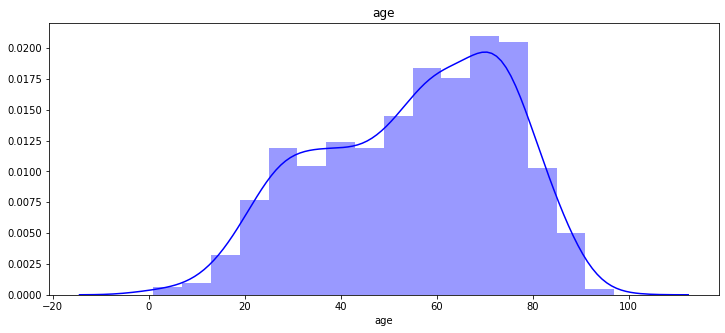

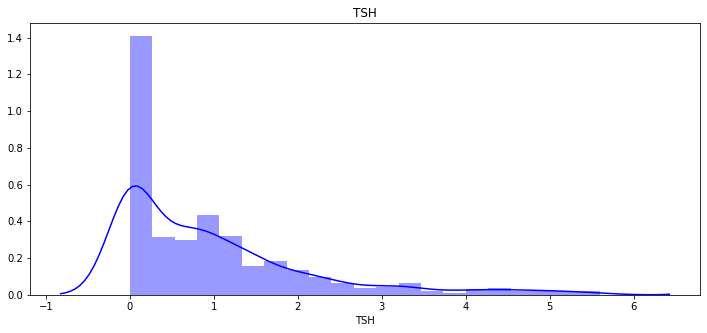

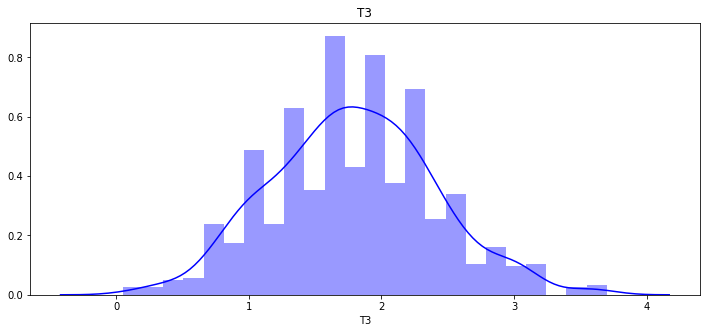

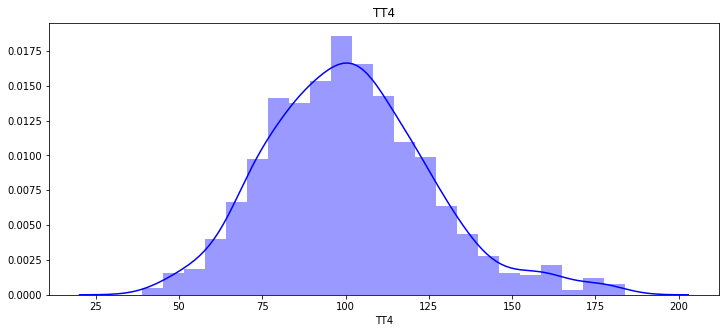

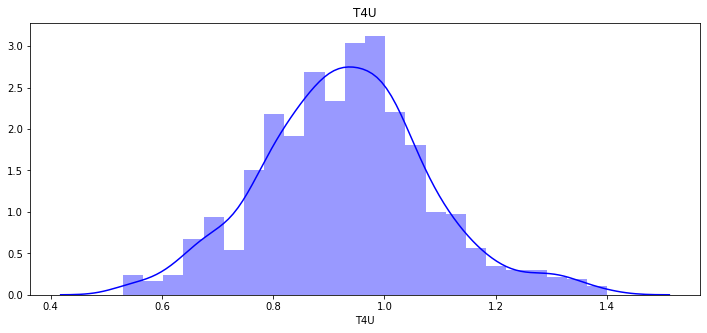

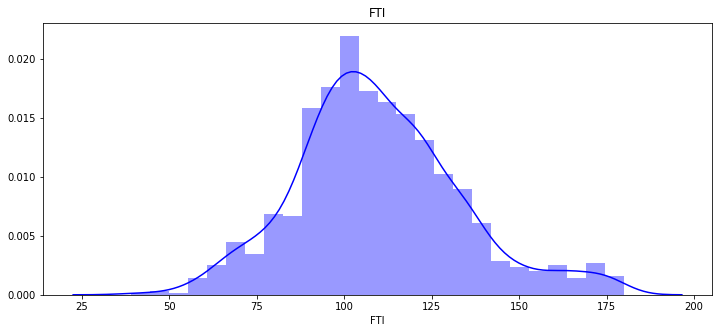

In [27]:
# Plot histogram for numerical values

for i, j in enumerate(numerical):
  plt.figure(figsize=(12, 5))
  plt.title(j)
  sns.distplot(df[j], color='blue', norm_hist=True)

ValueError: ignored

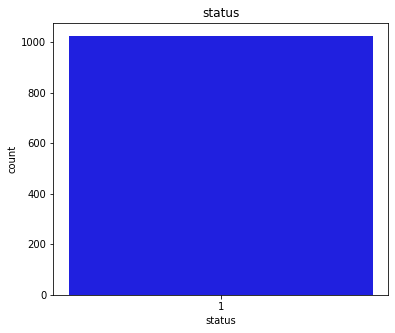

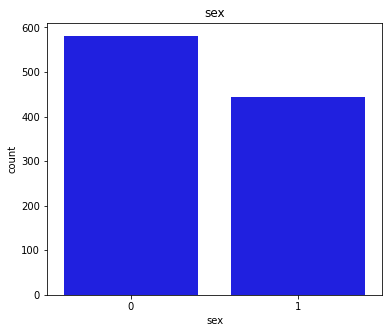

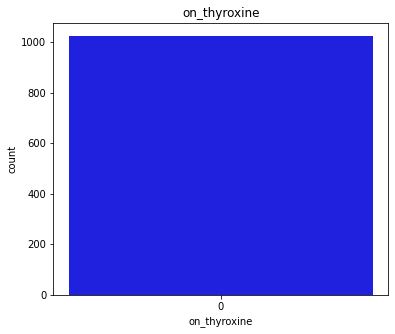

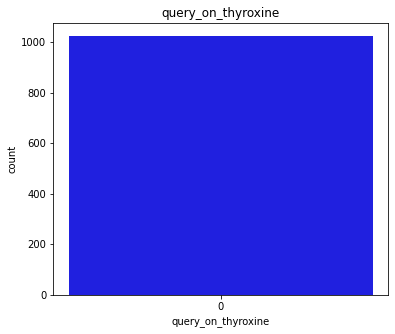

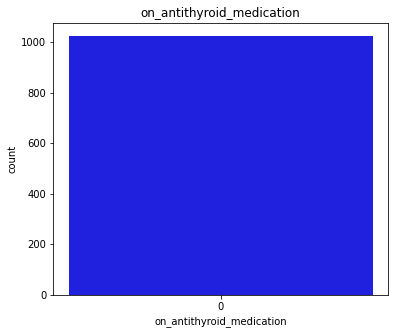

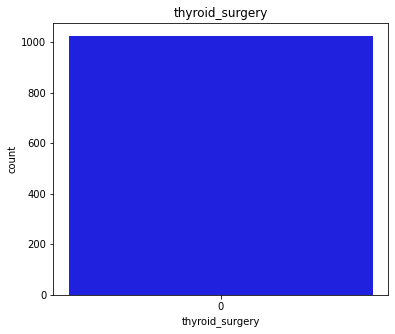

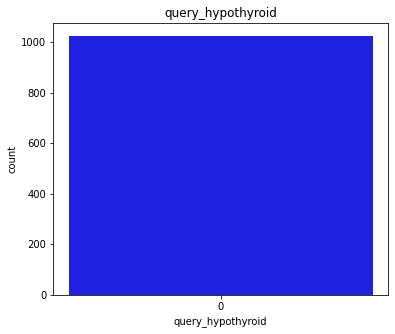

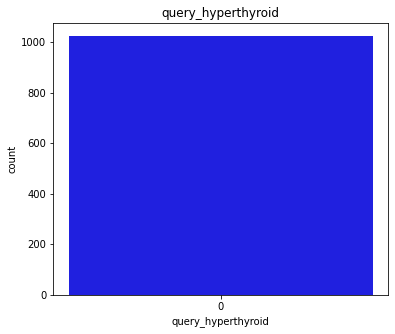

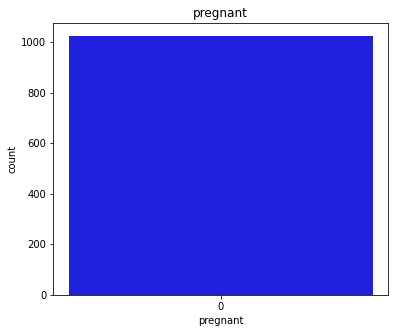

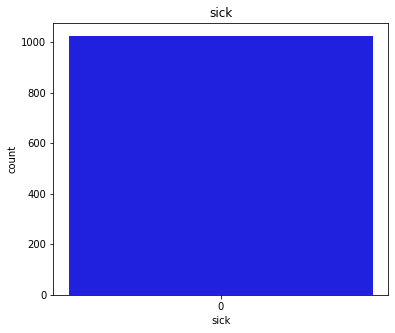

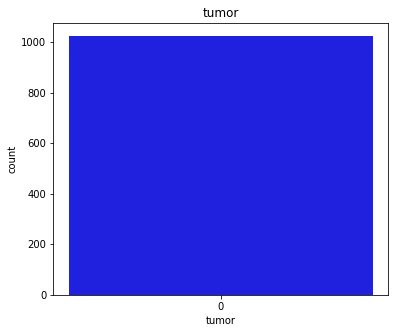

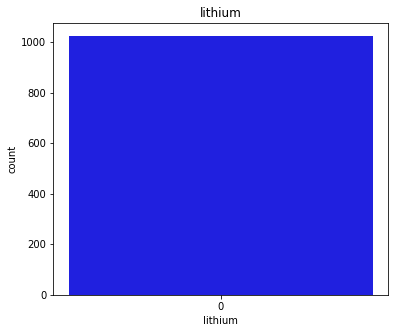

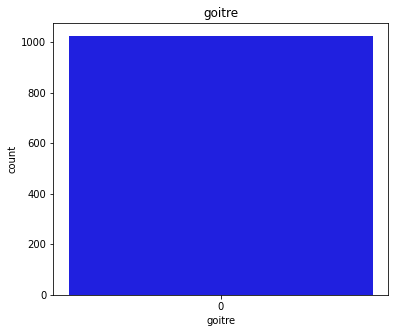

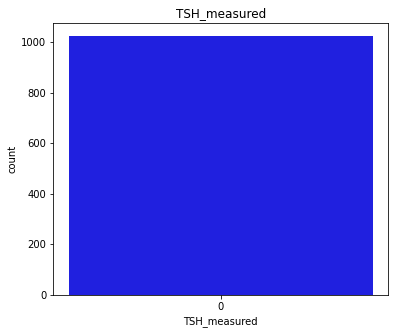

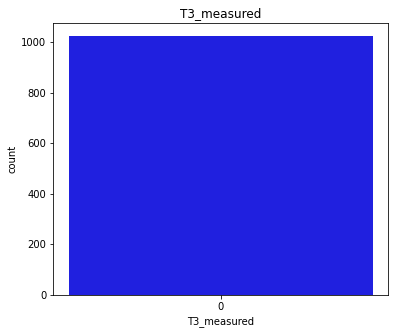

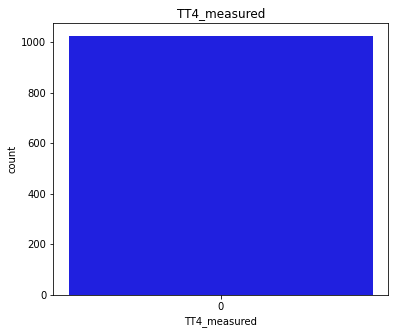

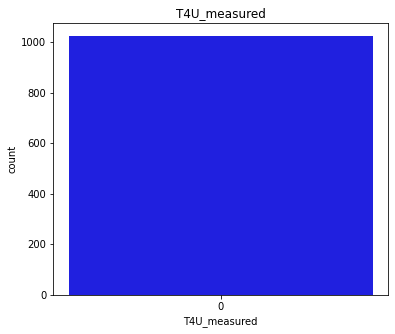

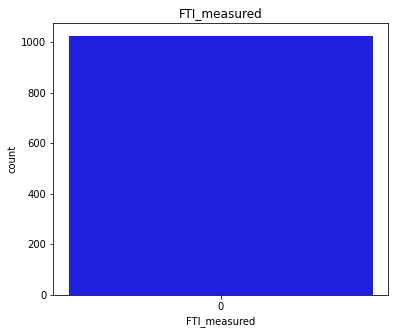

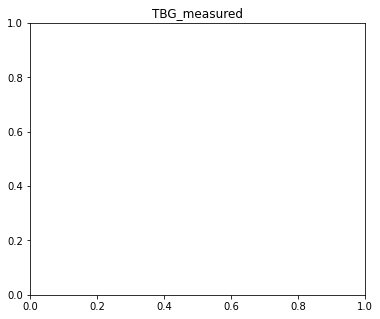

In [28]:
# Countplot of our Categorical Variables

Categorical = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
               'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 
               'lithium', 'goitre', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

for i,c in enumerate(Categorical):
  
  plt.figure(figsize=(6,5))
  plt.title(c)
  sns.countplot(df[c], color='blue')

print(df['status'].value_counts())

# BIVARIATE ANALYSIS

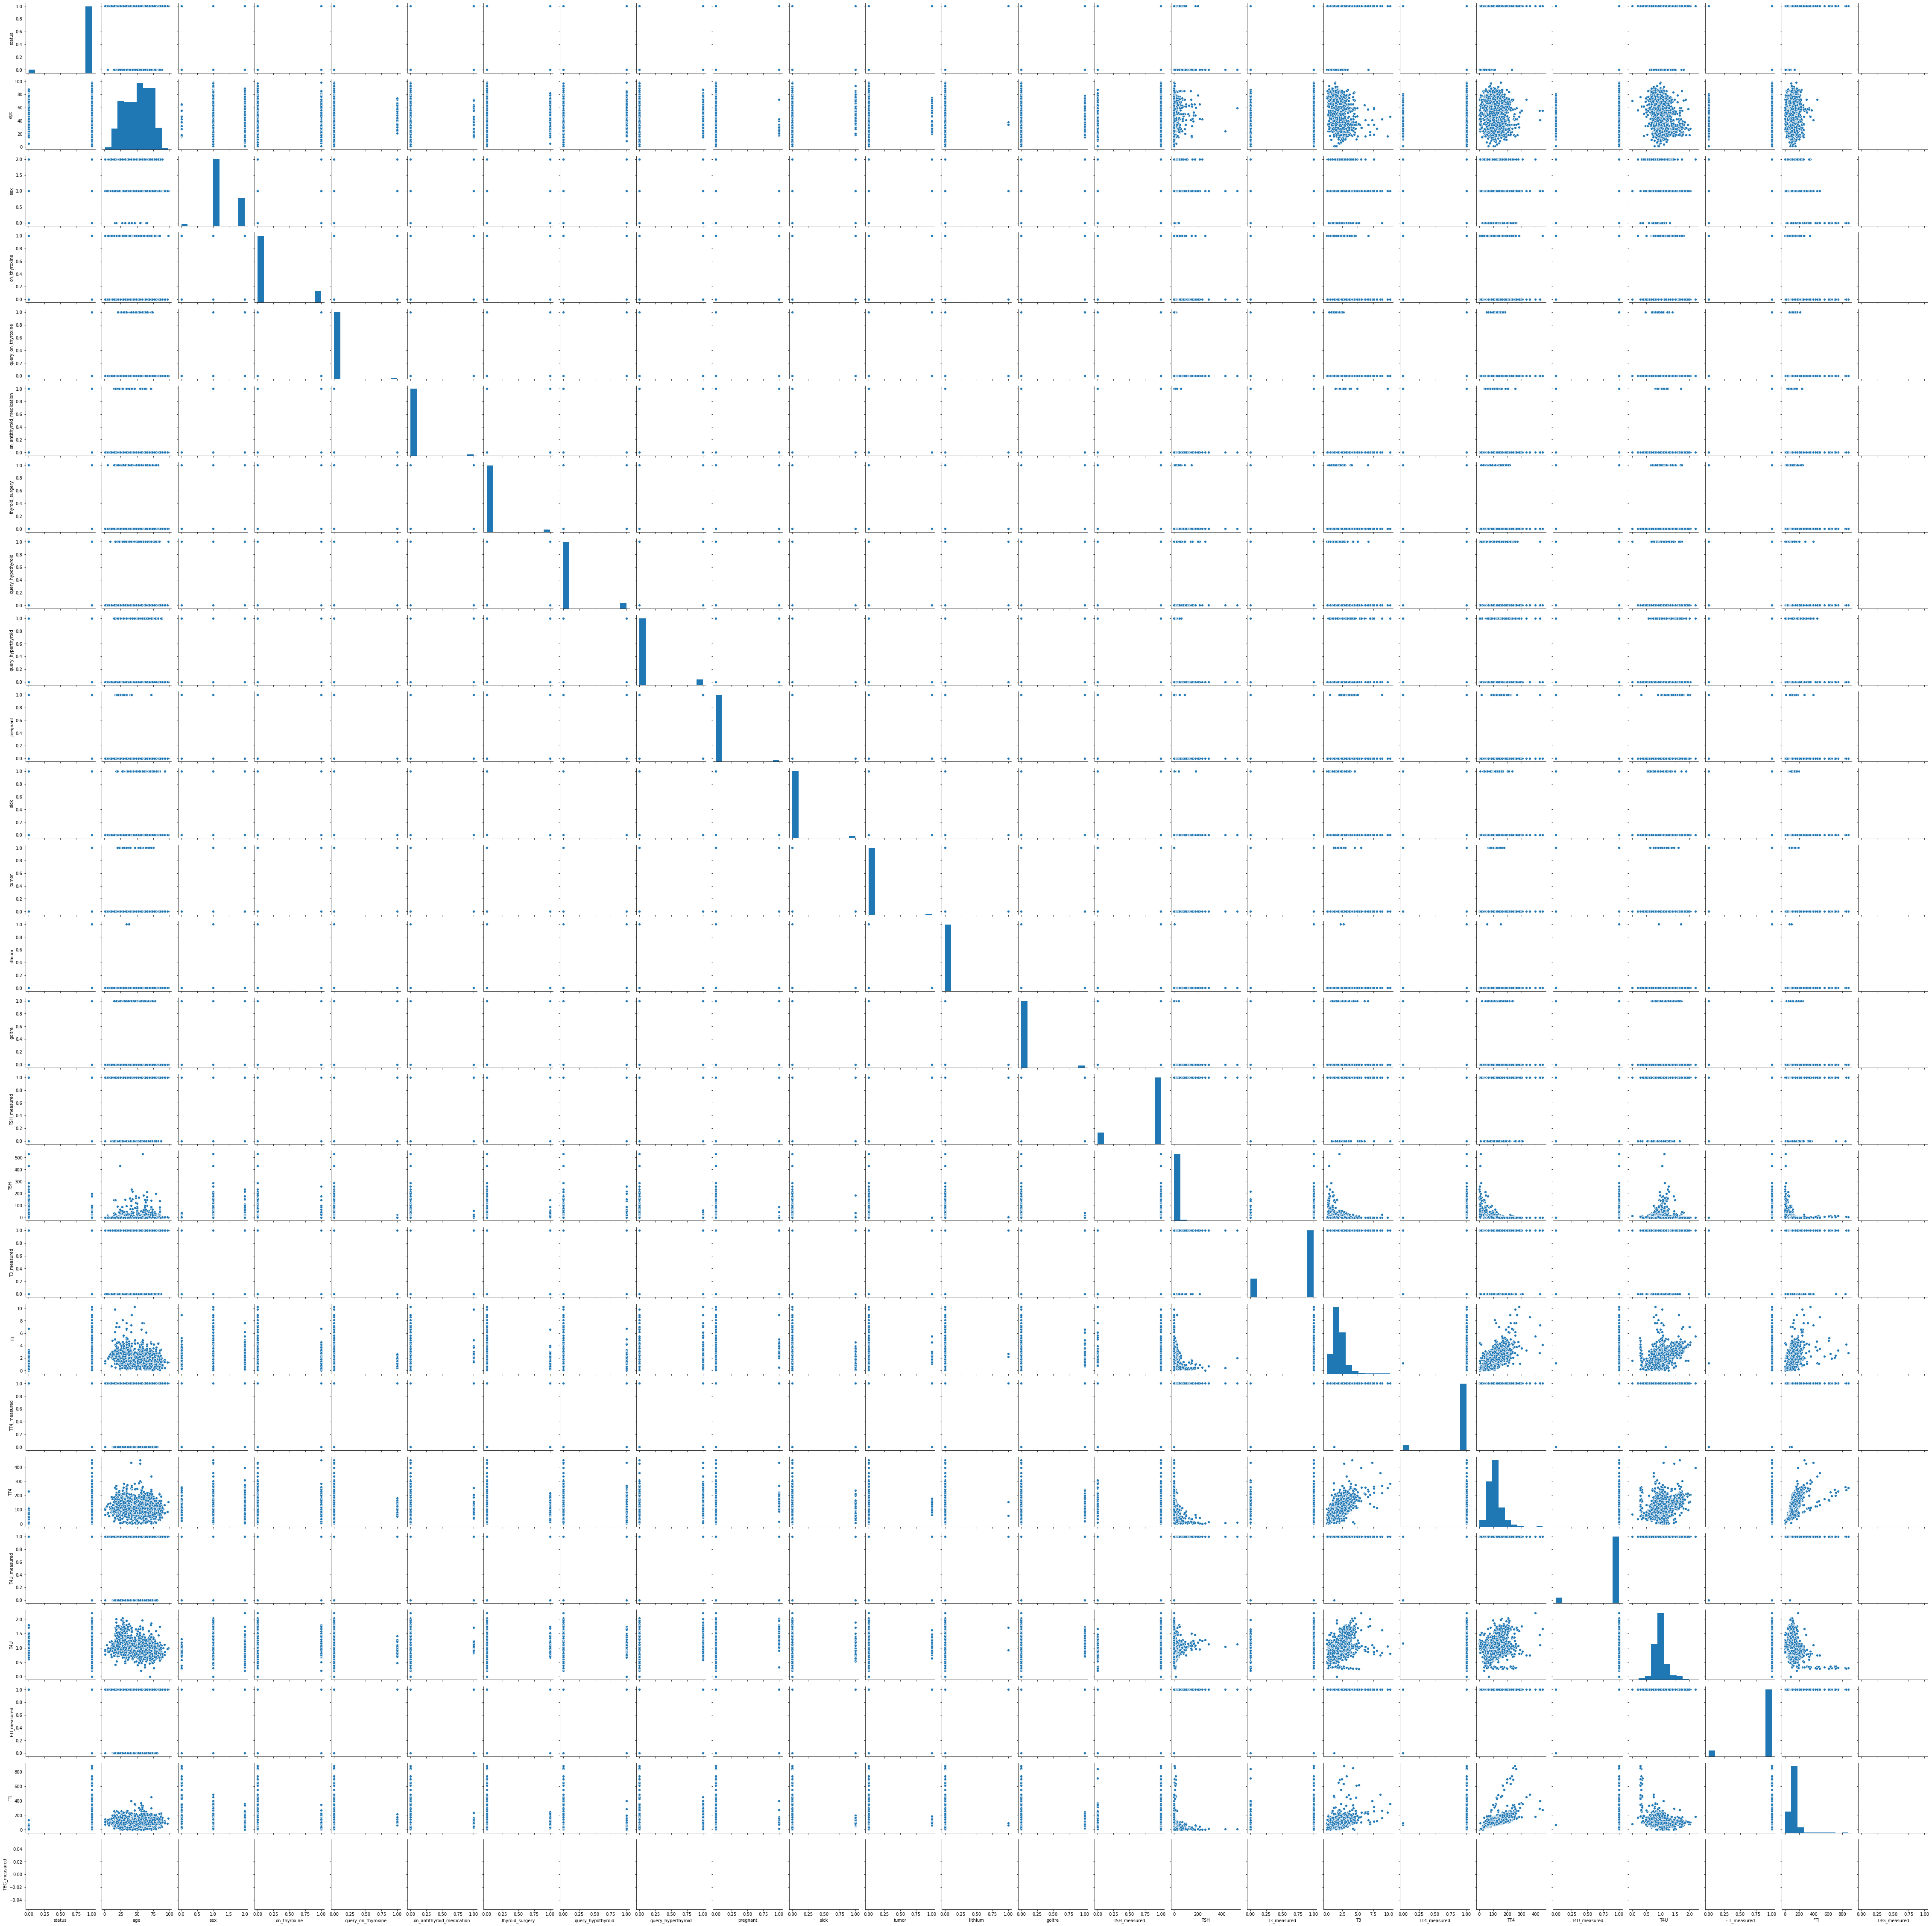

In [64]:
# Plotting the correlation matrix and recording our observations to show how different variables represented by different columns are correlated
sns.pairplot(df)
plt.show()

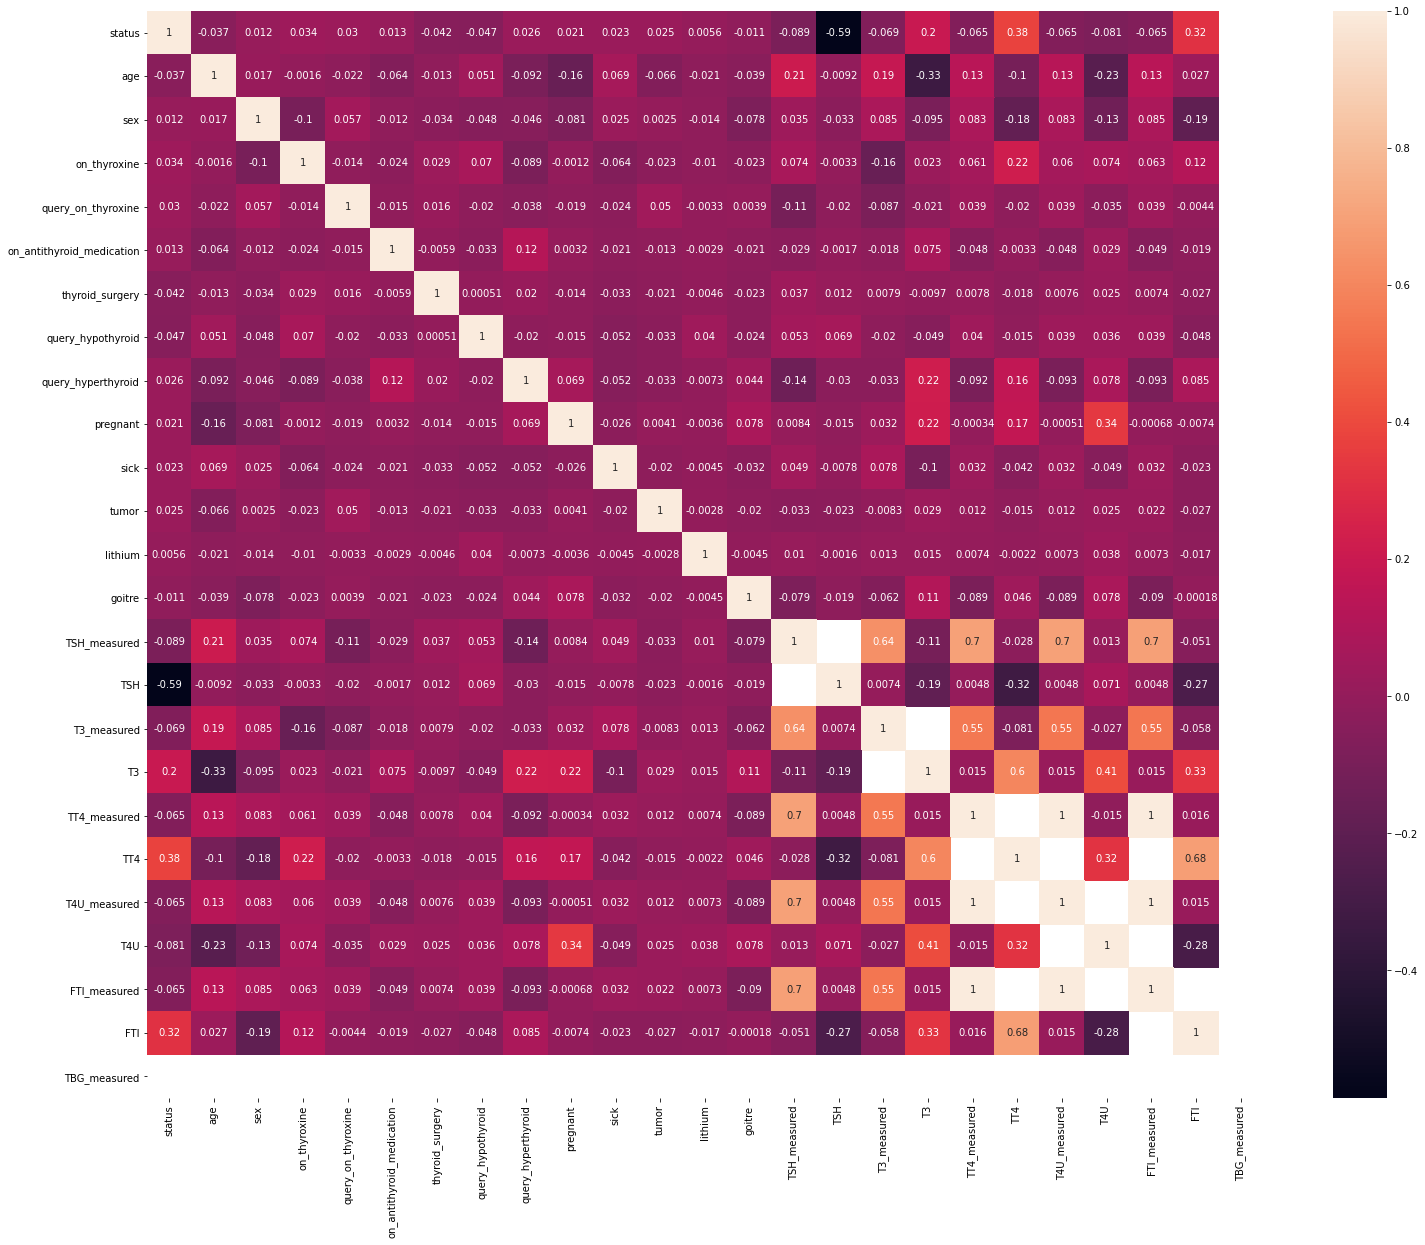

In [65]:
# Ploting a heatmap and recording our observations to show how fifferent variables represented by different columns are correlated

plt.figure(figsize=(25,20))

sns.heatmap(df.corr(),annot=True)

# IMPLEMENTING THE SOLUTION

# CHECKING FOR MULTICOLLINIARITY

In [31]:
# We will start by checking for mulicollinearlity
# create a correlation dataframe

linear_cor = pd.DataFrame(df.corr(), index= df.columns, columns=df.columns)
linear_cor

# Check for multicollinearlity

linear_mcor = pd.DataFrame(np.linalg.inv(linear_cor.values), index=linear_cor.columns, columns = linear_cor.columns)
linear_mcor

# get the multicolinearity values

pd.DataFrame(data=np.diag(linear_mcor), index=linear_mcor.columns, columns = {'multicollinearity'})

,multicollinearity
status,NaN
age,NaN
sex,NaN
on_thyroxine,NaN
query_on_thyroxine,NaN
on_antithyroid_medication,NaN
thyroid_surgery,NaN
query_hypothyroid,NaN
query_hyperthyroid,NaN
pregnant,NaN


Observations
I can't establish why I'm getting this error, because I have removed values appearing as ?

# RANDOM FOREST

In [64]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = df['status'].values


test_features = df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

ValueError: ignored

In [0]:
# assessing performance of model
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [0]:
# visual representation of the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())


In [0]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [0]:
# representing importance on a graph
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# ADA BOOSTING

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state= 42)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# 
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=2)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

ValueError: ignored

# GRADIENT BOOSTING

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=4)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=4)
plt.plot(X, y_pred_gbr, c="b", label="gbr 300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

ValueError: ignored

# SUPPORT VECTOR MACHINES

In [0]:
# using the important features from random forest
important_columns = pd.DataFrame(feature_importances, columns = {'Feature', 'Importance'})
important = important_columns. iloc[:7,:]
important

In [0]:
# creating new data set with important features

df_new = df[['status','t3', 'tt4','fti','age','t4u','thyroid_surgery', 'on_thyroxine']]
df_new.head()

In [0]:
# split dataset into features and targets

y = df_new.iloc[:, :1].values
X = df_new.iloc[:, 1:].values

# and applying the reduction algorithm: PCA


lpca = PCA(n_components=2)

X = lpca.fit_transform(X)
X.shape

In [0]:
# Split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
# using linear kernel

# Import the SVC model
from sklearn.svm import SVC

#fit the model
linear_class = SVC(kernel='linear', gamma='auto')
linear_class.fit(X_train, y_train)

y_pred = linear_class.predict(X_test)

print('accuracy = ', accuracy_score(y_test, y_pred))

comparison = pd.DataFrame({'Actual': y_test.flatten(), 'predicted': y_pred.flatten()})
comparison.describe()

In [0]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = linear_class.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, linear_class, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()